In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings(action='ignore')

In [87]:
#synthetic dataset
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)
x

array([[ 5.99633159,  1.45210597],
       [ 6.68788263,  2.19039719],
       [ 8.71011717, -7.28508139],
       ...,
       [ 6.42619261,  1.05398896],
       [ 6.21150318,  1.07151557],
       [-7.34024241,  0.84907231]])

In [88]:
y

array([1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,

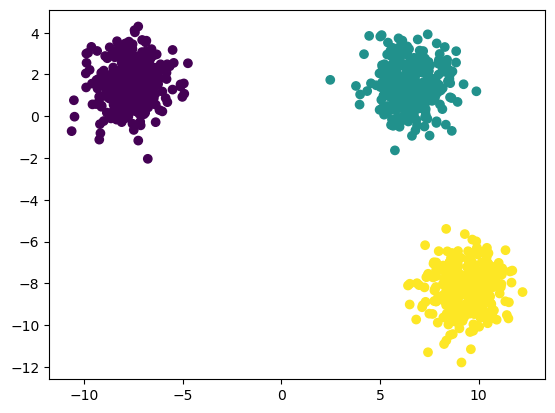

In [89]:
plt.scatter(x[:,0],x[:,1],c=y)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.fit(x_test)

In [92]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x_scaled_train)
    wcss.append(model.inertia_)

In [93]:
wcss

[1340.0000000000005,
 448.90122605482486,
 41.8920327431563,
 36.39899492942635,
 28.779812265246544,
 26.70954992754331,
 21.213270286697266,
 19.595709120579727,
 17.92966690108892,
 16.205750409275588]

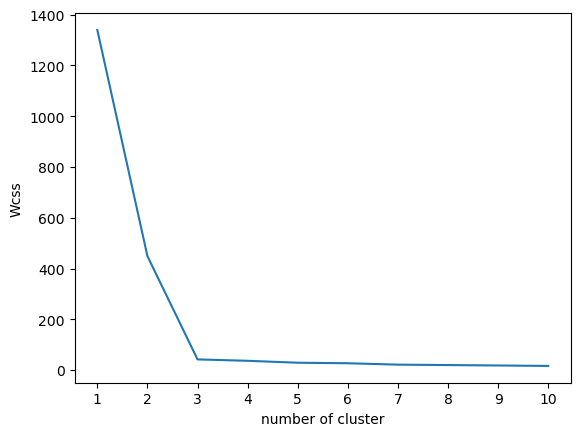

In [94]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of cluster")
plt.ylabel("Wcss")
plt.show()

In [95]:
kmeans=KMeans(n_clusters=i,init='k-means++')
yPred=kmeans.fit_predict(x_scaled_train)

In [96]:
yPred

array([7, 2, 2, 2, 7, 7, 4, 4, 7, 1, 7, 4, 9, 9, 8, 3, 0, 0, 0, 3, 5, 3,
       7, 1, 3, 7, 5, 7, 3, 4, 0, 4, 0, 6, 6, 0, 6, 5, 2, 3, 2, 1, 6, 3,
       0, 3, 1, 1, 2, 3, 7, 0, 6, 7, 9, 3, 1, 0, 6, 8, 2, 1, 7, 2, 7, 7,
       0, 7, 6, 7, 7, 6, 8, 3, 1, 4, 2, 3, 9, 2, 7, 8, 0, 2, 1, 5, 5, 3,
       6, 2, 7, 7, 1, 0, 0, 6, 0, 8, 7, 8, 2, 9, 8, 6, 5, 4, 7, 2, 8, 1,
       5, 5, 5, 1, 0, 1, 4, 3, 0, 0, 1, 2, 3, 1, 6, 3, 6, 6, 4, 1, 1, 5,
       3, 8, 0, 2, 6, 4, 1, 1, 6, 7, 1, 5, 7, 5, 6, 7, 4, 5, 9, 3, 0, 3,
       2, 7, 1, 3, 2, 6, 7, 5, 7, 7, 2, 7, 3, 9, 1, 7, 3, 6, 0, 6, 0, 6,
       7, 6, 3, 7, 8, 7, 4, 3, 7, 7, 1, 3, 2, 3, 4, 6, 8, 2, 4, 3, 7, 8,
       5, 6, 0, 3, 3, 2, 4, 4, 2, 1, 7, 1, 7, 7, 6, 5, 2, 7, 7, 3, 2, 2,
       0, 4, 7, 3, 1, 6, 7, 4, 7, 6, 9, 0, 0, 0, 6, 3, 2, 6, 7, 7, 0, 5,
       9, 4, 2, 1, 3, 2, 6, 8, 2, 6, 5, 0, 5, 5, 9, 1, 6, 2, 5, 8, 4, 8,
       5, 2, 3, 3, 1, 4, 8, 3, 2, 2, 7, 3, 2, 5, 8, 3, 8, 1, 0, 3, 3, 2,
       4, 7, 0, 9, 0, 1, 6, 6, 4, 5, 7, 3, 5, 2, 2,

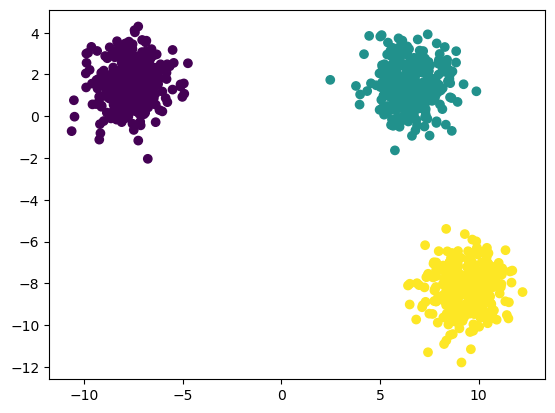

In [97]:
plt.scatter(x[:,0],x[:,1],c=y)

In [98]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [99]:
#kneelocator

In [100]:
!pip install kneed

In [101]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [105]:
#silhouette scoring
from sklearn.metrics import silhouette_score
silhouette_coeff=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x_scaled_train)
    scores=silhouette_score(x_scaled_train,model.labels_)
    silhouette_coeff.append(scores)

In [106]:
silhouette_coeff

[0.6579274188375733,
 0.8419368480254098,
 0.6947725077165868,
 0.6630731829609399,
 0.38314067839973254,
 0.4679408003523168,
 0.33866869889402956,
 0.32101238835825047,
 0.3271111362607076]

Text(0, 0.5, 'Silhoutte Coeffecient')

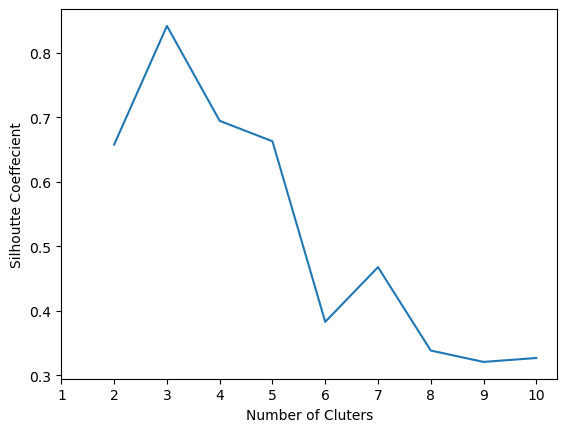

In [108]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(1,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")

NOte := hignest value of silhoutte coeff is at 3 so k=3